## Datenset

Das Seoul Bike Data Set enthält Daten von Fahrradverleihen in Seoul (Südkorea). Hier werden bei jedem Verleih einige zusätzliche Daten gespeichert.

Bei diesem Datenset geht es darum, Lineare Regression anzuwenden, um Zukunftswerte vorherzusagen.

- Date : year-month-day
- Rented Bike count - Count of bikes rented at each hour
- Hour - Hour of he day
- Temperature-Temperature in Celsius
- Humidity - %
- Windspeed - m/s
- Visibility - 10m
- Dew point temperature - Celsius
- Solar radiation - MJ/m2
- Rainfall - mm
- Snowfall - cm
- Seasons - Winter, Spring, Summer, Autumn
- Holiday - Holiday/No holiday
- Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data = pd.read_csv("Data\SeoulBikeData.csv").drop(["Date", "Holiday", "Seasons", "Functioning Day"], axis=1)

In [16]:
data = data[data["Hour"] == 12]

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 12 to 8748
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   bike_count                 365 non-null    int64  
 1   Hour                       365 non-null    int64  
 2   Temperature(°C)            365 non-null    float64
 3   Humidity(%)                365 non-null    int64  
 4   Wind speed (m/s)           365 non-null    float64
 5   Visibility (10m)           365 non-null    int64  
 6   Dew point temperature(°C)  365 non-null    float64
 7   Solar Radiation (MJ/m2)    365 non-null    float64
 8   Rainfall(mm)               365 non-null    float64
 9   Snowfall (cm)              365 non-null    float64
dtypes: float64(6), int64(4)
memory usage: 31.4 KB


In [40]:
data = data.rename(columns={"Rented Bike Count": "bike_count", "Temperature(°C)": "temp"})

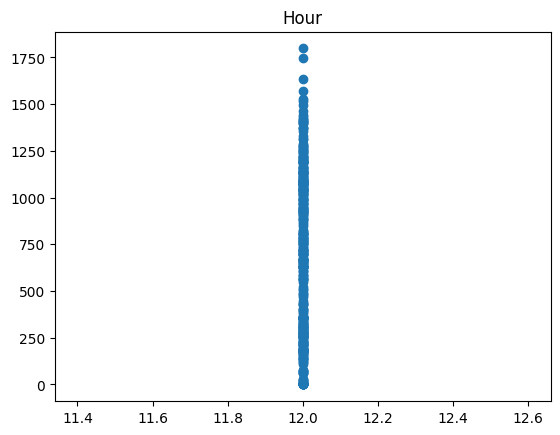

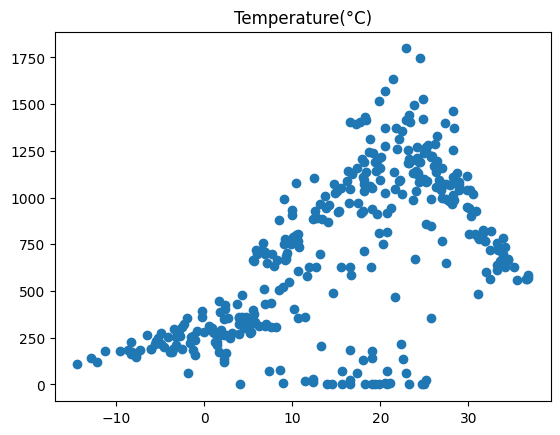

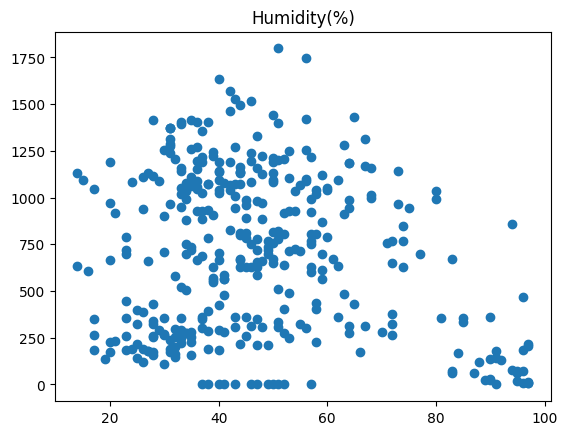

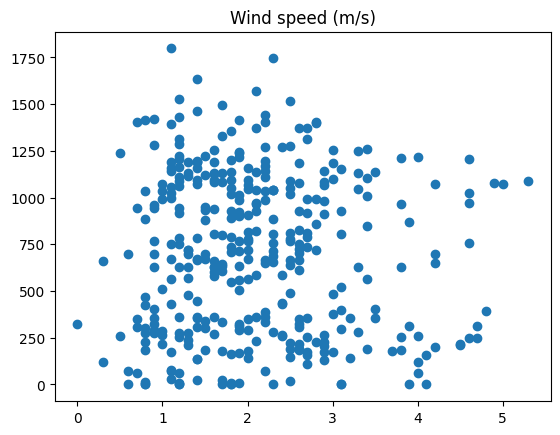

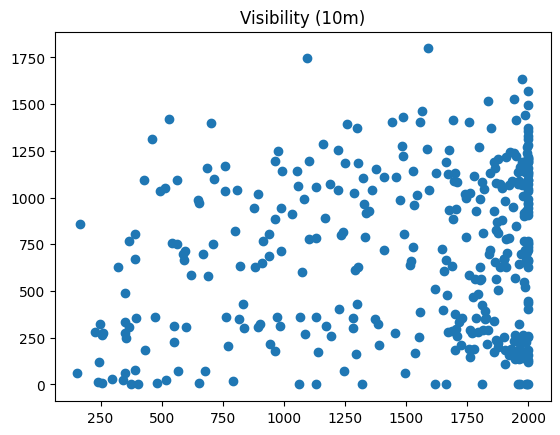

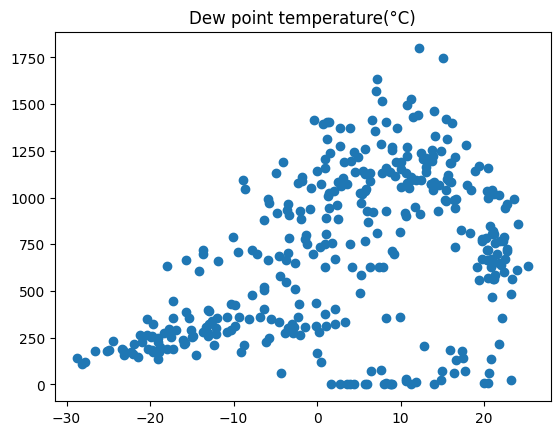

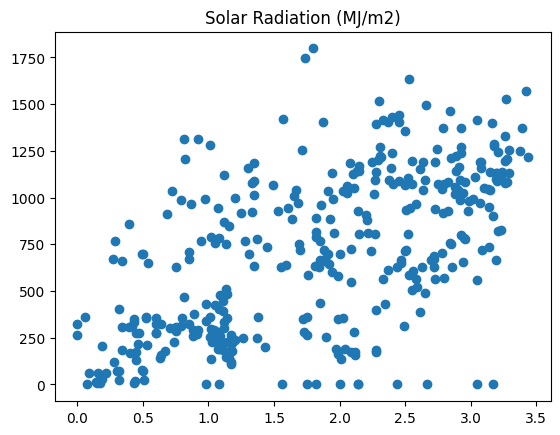

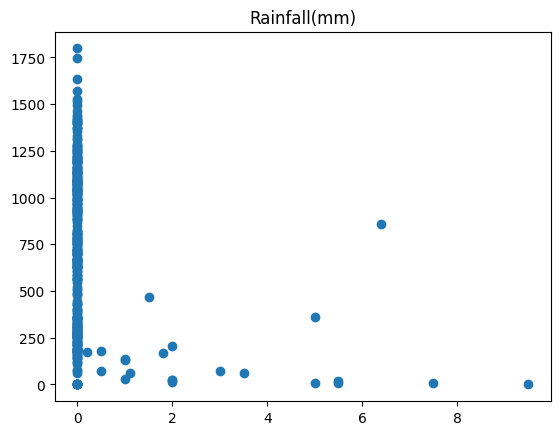

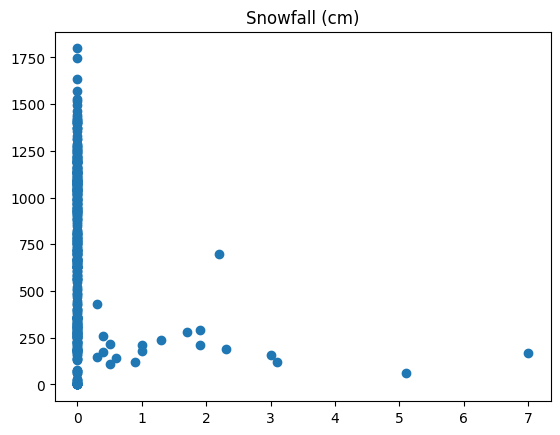

In [19]:
for col in data.columns[1:]:
    plt.scatter(data[col], data["bike_count"])
    plt.title(col)
    plt.show()

In [21]:
data.drop(columns={"Hour", "Rainfall(mm)", "Snowfall (cm)"}, inplace=True)

In [23]:
data

,bike_count,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
12,449,1.7,23,1.4,2000,-17.2,1.11
36,479,4.3,41,1.3,1666,-7.8,1.09
60,333,5.8,85,1.7,349,3.4,0.43
84,393,-0.3,38,4.8,1823,-12.9,1.11
108,321,-2.3,25,0.0,1962,-19.7,0.00
...,...,...,...,...,...,...,...
8652,752,9.1,57,1.1,562,1.0,1.69
8676,672,9.3,61,1.5,390,2.1,0.85
8700,635,7.9,14,1.7,1688,-18.0,1.81
8724,661,5.6,27,0.3,1522,-11.9,0.34


## Drei Datensets

In [41]:
train, validate, test = np.split(data.sample(frac=1), [int(0.6 * len(data)), int(0.8 * len(data))])

In [42]:
print(len(train), len(validate), len(test))

219 73 73


In [43]:
def splitDF(dataframe):
    x = dataframe["temp"].values.reshape(-1, 1)
    y = dataframe["bike_count"].values.reshape(-1, 1)
    
    return x, y

In [45]:
x_train_temperature, y_train_temperature = splitDF(train)
x_validate_temperature, y_validate_temperature = splitDF(validate)
x_test_temperature, y_test_temperature = splitDF(test)

## Linearer Regressor aus SciKit-Learn

In [46]:
from sklearn.linear_model import LinearRegression

In [48]:
model_temperature = LinearRegression()
model_temperature.fit(x_train_temperature, y_train_temperature)

LinearRegression()

In [50]:
model_temperature.score(x_test_temperature, y_test_temperature)  # Gibt die Korrelation der beiden Spalten an (22%)

0.2262545688806542

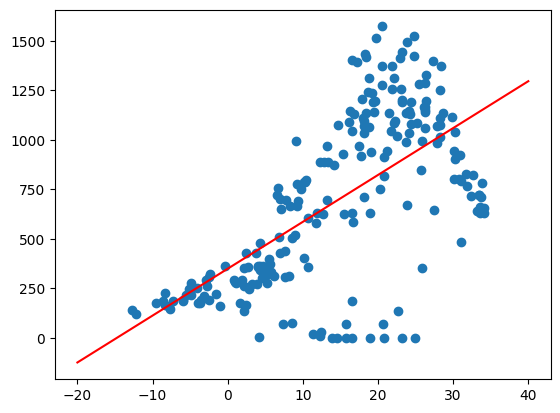

In [57]:
x = np.linspace(-20, 40, 100)  # Array mit hundert Schritten von -20° bis 40°

model_temperature.predict(x.reshape(-1, 1))
plt.scatter(x_train_temperature, y_train_temperature)
plt.plot(x, model_temperature.predict(x.reshape(-1, 1)), color="Red")

In [58]:
# Diese Linie ist nicht unbedingt aussagekräftig -> Machine Learning

## Multiple Lineare Regression

Simple Regression aber mit mehr als einem Wert (nur Temperatur -> alle Werte)

In [64]:
def splitDF(dataframe):
    x = dataframe[dataframe.columns[1:]].values
    y = dataframe["bike_count"].values.reshape(-1, 1)
    
    return x, y

In [65]:
x_train_all, y_train_all = splitDF(train)
x_validate_all, y_validate_all = splitDF(validate)
x_test_all, y_test_all = splitDF(test)

In [66]:
model_all = LinearRegression()
model_all.fit(x_train_all, y_train_all)

LinearRegression()

In [67]:
model_all.score(x_test_all, y_test_all)  # Korrelation alle Spalten zu Bike Count = ~40%

0.39260133759858495

In [78]:
prediction = model_all.predict(x_test_all)
left_real = pd.DataFrame(x_test_all)
left_real["Prediction"] = prediction
left_real["Actual"] = y_test_all
pct = left_real["Prediction"] / left_real["Actual"]
left_real["%"] = pct
left_real.loc[left_real["%"] > 1, "%"] = np.power(pct[pct > 1], -1)
left_real["%"] *= 100

left_real.sort_values("%")

,0,1,2,3,4,5,Prediction,Actual,%
55,19.8,49.0,2.3,1320.0,8.7,3.17,983.114984,0,0.000000
22,24.7,43.0,1.8,1809.0,11.2,1.75,885.985818,0,0.000000
65,18.3,40.0,0.6,1995.0,4.4,1.82,841.234585,0,0.000000
67,25.2,89.0,1.4,340.0,23.2,0.32,522.750611,25,4.782395
35,9.0,96.0,1.9,481.0,8.3,0.43,179.659042,10,5.566099
...,...,...,...,...,...,...,...,...,...
58,26.7,40.0,1.4,2000.0,11.9,2.92,1123.921660,1095,97.426719
10,19.9,44.0,2.7,1874.0,7.2,2.22,834.130029,813,97.466818
66,1.7,23.0,1.4,2000.0,-17.2,1.11,438.086480,449,97.569372
17,2.4,52.0,0.9,1224.0,-6.4,1.08,400.536827,405,98.897982


## Regression mit Neuralem Netzwerk

In [79]:
import tensorflow as tf

Erster Test nur mit Temperatur

In [82]:
temperature_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temperature_normalizer.adapt(x_train_temperature.reshape(-1))

In [83]:
temperature_model = tf.keras.Sequential([
    temperature_normalizer,
    tf.keras.layers.Dense(1)
])

In [84]:
temperature_model.compile(optimizer=tf.keras.optimizers.Adam(0.1), loss="mean_squared_error")

In [85]:
history = temperature_model.fit(x_train_temperature.reshape(-1), y_train_temperature, epochs=1000)

Epoch 1/1000
7/7 [==============================] - 0s 3ms/step - loss: 667615.0000
Epoch 2/1000
7/7 [==============================] - 0s 2ms/step - loss: 666313.5000
Epoch 3/1000
7/7 [==============================] - 0s 2ms/step - loss: 664991.9375
Epoch 4/1000
7/7 [==============================] - 0s 2ms/step - loss: 663725.6875
Epoch 5/1000
7/7 [==============================] - 0s 2ms/step - loss: 662422.4375
Epoch 6/1000
7/7 [==============================] - 0s 3ms/step - loss: 661111.0625
Epoch 7/1000
7/7 [==============================] - 0s 2ms/step - loss: 659805.4375
Epoch 8/1000
7/7 [==============================] - 0s 2ms/step - loss: 658504.1875
Epoch 9/1000
7/7 [==============================] - 0s 2ms/step - loss: 657214.2500
Epoch 10/1000
7/7 [==============================] - 0s 2ms/step - loss: 655899.6250
Epoch 11/1000
7/7 [==============================] - 0s 2ms/step - loss: 654624.8750
Epoch 12/1000
7/7 [==============================] - 0s 3ms/step - loss: 6

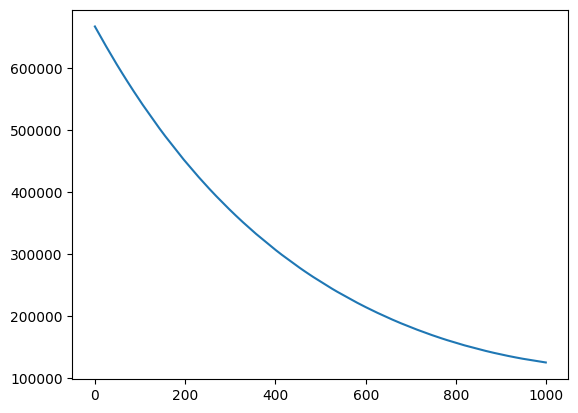

In [86]:
plt.plot(history.history["loss"])

In [87]:
temperature_model.predict(x_test_temperature)

3/3 [==============================] - 0s 2ms/step


array([[ 798.03613 ],
       [ 615.9705  ],
       [ 819.3166  ],
       [ 753.11084 ],
       [-117.020935],
       [ 143.07281 ],
       [ 353.5123  ],
       [ 772.0268  ],
       [ 871.3353  ],
       [ 251.8393  ],
       [ 693.99866 ],
       [ 244.74582 ],
       [ 348.78333 ],
       [ 634.8864  ],
       [ 235.28787 ],
       [  93.41858 ],
       [ 443.36285 ],
       [ 280.21313 ],
       [ 795.6717  ],
       [1039.214   ],
       [ -43.72174 ],
       [ 620.69946 ],
       [ 807.49414 ],
       [ 821.681   ],
       [ 611.2416  ],
       [ 261.29727 ],
       [ 180.90466 ],
       [ 977.7373  ],
       [ 495.38162 ],
       [ 549.76483 ],
       [ 114.698944],
       [1025.0271  ],
       [ 980.1018  ],
       [1093.5972  ],
       [ 277.8487  ],
       [ 436.2694  ],
       [ 973.0083  ],
       [ 890.2512  ],
       [ 559.2228  ],
       [ 861.8773  ],
       [ 580.50323 ],
       [1039.214   ],
       [1022.6626  ],
       [ 192.72708 ],
       [ 266.02625 ],
       [ 7

In [90]:
prediction = temperature_model.predict(x_test_temperature)
left_real = pd.DataFrame(x_test_temperature)
left_real["Prediction"] = prediction
left_real["Actual"] = y_test_temperature
pct = left_real["Prediction"] / left_real["Actual"]
left_real["%"] = pct
left_real.loc[left_real["%"] > 1, "%"] = np.power(pct[pct > 1], -1)
left_real["%"] *= 100

left_real["%"].mean()

3/3 [==============================] - 0s 3ms/step


55.321915662465734

4/4 [==============================] - 0s 5ms/step


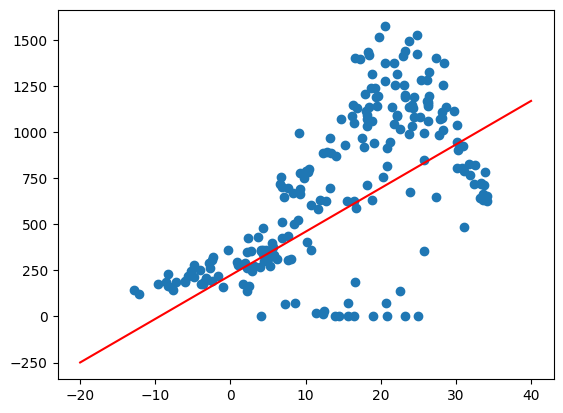

In [92]:
x = np.linspace(-20, 40, 100)  # Array mit hundert Schritten von -20° bis 40°

plt.scatter(x_train_temperature, y_train_temperature)
plt.plot(x, temperature_model.predict(x.reshape(-1, 1)), color="Red")

## Komplexer Netzwerke

In [118]:
temperature_normalizer = tf.keras.layers.Normalization(input_shape=(1, ), axis=None)
temperature_normalizer.adapt(x_train_temperature.reshape(-1))

In [119]:
temperature_model = tf.keras.Sequential([
    temperature_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)  # Hier keine Funktion -> f(x) = x
])

In [120]:
temperature_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [121]:
history = temperature_model.fit(x_train_temperature, y_train_temperature, epochs=100, validation_data=(x_validate_temperature, y_validate_temperature))

Epoch 1/100
7/7 [==============================] - 4s 112ms/step - loss: 668658.4375 - val_loss: 728461.4375
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 668469.6875 - val_loss: 728231.8750
Epoch 3/100
7/7 [==============================] - 0s 32ms/step - loss: 668243.5000 - val_loss: 727936.2500
Epoch 4/100
7/7 [==============================] - 0s 34ms/step - loss: 667945.6250 - val_loss: 727548.5000
Epoch 5/100
7/7 [==============================] - 0s 36ms/step - loss: 667550.6875 - val_loss: 727015.6250
Epoch 6/100
7/7 [==============================] - 0s 36ms/step - loss: 667016.0625 - val_loss: 726291.2500
Epoch 7/100
7/7 [==============================] - 0s 40ms/step - loss: 666279.1875 - val_loss: 725294.5000
Epoch 8/100
7/7 [==============================] - 0s 43ms/step - loss: 665249.8750 - val_loss: 723980.3750
Epoch 9/100
7/7 [==============================] - 0s 57ms/step - loss: 663930.4375 - val_loss: 722122.3125
Epoch 10/100
7/7 [=========

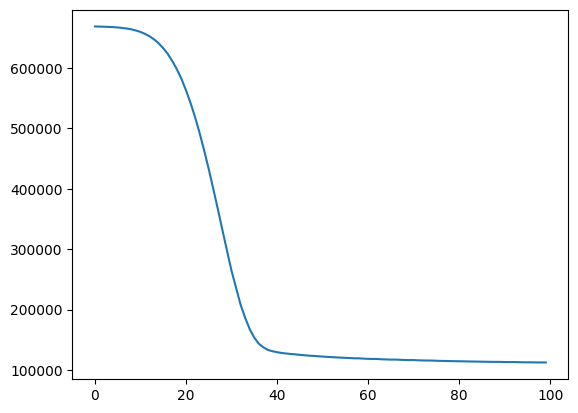

In [122]:
plt.plot(history.history["loss"])

4/4 [==============================] - 0s 6ms/step


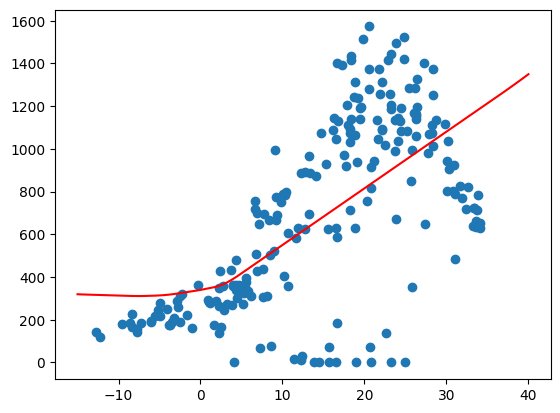

In [123]:
x = np.linspace(-15, 40, 100)  # Array mit hundert Schritten von -20° bis 40°

plt.scatter(x_train_temperature, y_train_temperature)
plt.plot(x, temperature_model.predict(x.reshape(-1, 1)), color="Red")

In [124]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(6, ), axis=-1)
all_normalizer.adapt(x_train_all)

In [125]:
all_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)  # Hier keine Funktion -> f(x) = x
])

In [126]:
all_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss="mean_squared_error")

In [127]:
history = all_model.fit(x_train_all, y_train_all, epochs=100, validation_data=(x_validate_all, y_validate_all))

Epoch 1/100
7/7 [==============================] - 3s 112ms/step - loss: 668829.3125 - val_loss: 728416.1250
Epoch 2/100
7/7 [==============================] - 0s 31ms/step - loss: 668406.1875 - val_loss: 727993.3125
Epoch 3/100
7/7 [==============================] - 0s 30ms/step - loss: 667984.7500 - val_loss: 727521.8750
Epoch 4/100
7/7 [==============================] - 0s 41ms/step - loss: 667505.5625 - val_loss: 726964.0625
Epoch 5/100
7/7 [==============================] - 0s 36ms/step - loss: 666920.1875 - val_loss: 726240.9375
Epoch 6/100
7/7 [==============================] - 0s 38ms/step - loss: 666168.1250 - val_loss: 725237.4375
Epoch 7/100
7/7 [==============================] - 0s 44ms/step - loss: 665055.2500 - val_loss: 723828.0625
Epoch 8/100
7/7 [==============================] - 0s 54ms/step - loss: 663521.0000 - val_loss: 721820.2500
Epoch 9/100
7/7 [==============================] - 0s 45ms/step - loss: 661433.6250 - val_loss: 718970.8750
Epoch 10/100
7/7 [=========

In [132]:
prediction = all_model.predict(x_test_all)
left_real = pd.DataFrame(x_test_all)
left_real["Prediction"] = prediction
left_real["Actual"] = y_test_all
pct = left_real["Prediction"] / left_real["Actual"]
left_real["%"] = pct
left_real.loc[left_real["%"] > 1, "%"] = np.power(pct[pct > 1], -1)
left_real["%"] *= 100

left_real["%"].mean()

3/3 [==============================] - 0s 5ms/step


61.05133612030817

3/3 [==============================] - 0s 3ms/step


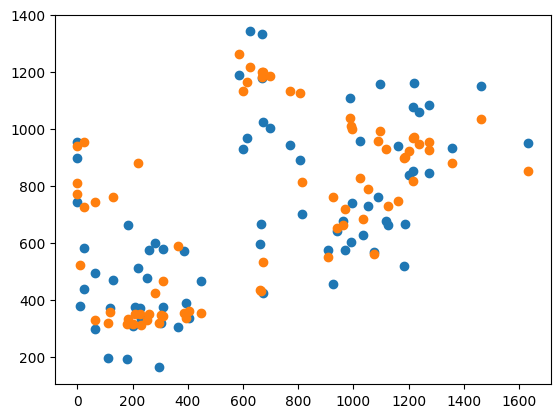

In [131]:
plt.scatter(y_test_all, all_model.predict(x_test_all))
plt.scatter(y_test_temperature, temperature_model.predict(x_test_temperature))

In [133]:
prediction = temperature_model.predict(x_test_temperature)
left_real = pd.DataFrame(x_test_temperature)
left_real["Prediction"] = prediction
left_real["Actual"] = y_test_temperature
pct = left_real["Prediction"] / left_real["Actual"]
left_real["%"] = pct
left_real.loc[left_real["%"] > 1, "%"] = np.power(pct[pct > 1], -1)
left_real["%"] *= 100

left_real["%"].mean()

3/3 [==============================] - 0s 5ms/step


62.180622990559314